# Import

In [89]:
%load_ext autoreload
%autoreload 2

import importlib
import numpy as np
import math
import itertools 
import pandas as pd
import numpy as np
import io
import msoffcrypto
import openpyxl
import plotly.express as px
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import streamlit as st
import json
from IPython.display import Markdown, display
import toml
import sys, os
import collections
from types import SimpleNamespace
import copy
import matplotlib.patches as mpatch
import time

%matplotlib inline 
%config Completer.use_jedi = True

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


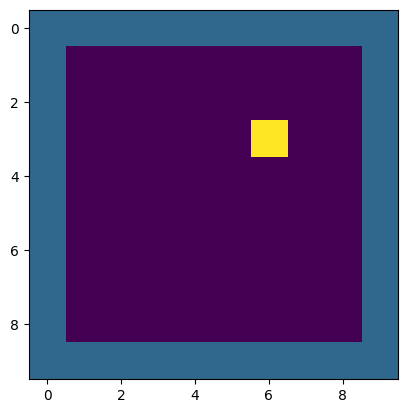

In [99]:
pos = [(5,5),(1,3),(9,3), (9,9)] 
EPOCH = 10
algo = env_([], False,10) 
grid = algo.grid
plt.imshow(grid)

In [97]:
grid

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 3, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [ ]:
np.choice()

In [91]:
G = nx.Graph()

nodes = {}
ri = 0
for pos in zip(*np.where(grid >= 2)):
    print(pos)
    if grid[pos] ==2:
        node = "R{}".format(ri)
        ri+=1
    if grid[pos] ==3:
        node = "H"

    nodes[node] = {'pos' : pos}
nodes

G.add_nodes_from(nodes.items())
G.nodes(data = True)

it = list(itertools.combinations(G.nodes(), 2))
it
edges = {}
for n1 , n2 in it:
    start = G.nodes[n1]['pos']
    goal  = G.nodes[n2]['pos']
    A = (grid !=0)*1
    A[goal] = 0
#     A = algo.grid0.copy()
#     n1,n2, start, goal , L
    A1 = Path1(A,start)
    path = Path2(A1.copy() ,start, goal)
    dist = len(path)
    G.add_edge(n1, n2, dist = dist,path = path)
#     edges[(n1,n2)] = {'dist': dist, 'path' : path}
    
G.edges(data = True)

 

(1, 3)
(3, 6)
(5, 5)
(9, 3)
(9, 9)


{'R0': {'pos': (1, 3)},
 'H': {'pos': (3, 6)},
 'R1': {'pos': (5, 5)},
 'R2': {'pos': (9, 3)},
 'R3': {'pos': (9, 9)}}

NodeDataView({'R0': {'pos': (1, 3)}, 'H': {'pos': (3, 6)}, 'R1': {'pos': (5, 5)}, 'R2': {'pos': (9, 3)}, 'R3': {'pos': (9, 9)}})

[('R0', 'H'),
 ('R0', 'R1'),
 ('R0', 'R2'),
 ('R0', 'R3'),
 ('H', 'R1'),
 ('H', 'R2'),
 ('H', 'R3'),
 ('R1', 'R2'),
 ('R1', 'R3'),
 ('R2', 'R3')]

EdgeDataView([('R0', 'H', {'dist': 6, 'path': [(1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6)]}), ('R0', 'R1', {'dist': 7, 'path': [(1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5)]}), ('R0', 'R2', {'dist': 9, 'path': [(1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)]}), ('R0', 'R3', {'dist': 23, 'path': [(1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (8, 4), (9, 4), (10, 4), (10, 5), (11, 5), (12, 5), (13, 5), (13, 6), (13, 7), (13, 8), (13, 9), (12, 9), (11, 9), (10, 9), (9, 9)]}), ('H', 'R1', {'dist': 4, 'path': [(3, 6), (4, 6), (5, 6), (5, 5)]}), ('H', 'R2', {'dist': 10, 'path': [(3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (7, 5), (8, 5), (9, 5), (9, 4), (9, 3)]}), ('H', 'R3', {'dist': 20, 'path': [(3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5), (13, 5), (13, 6), (13, 7), (13, 8), (13, 9), (12, 9), (11, 9), (10, 9), (9, 9)]}), ('R1', 'R2', {'dist': 7, 'path': [(5, 5), (6, 5), (7, 5), (8, 5), (9, 5),

In [94]:
for n1,n2, data in G.edges(data = True):
    L = data['path']
    L = np.array(L)*algo.pas + algo.pas/2
    L = list(map(tuple, L))
    for j in range(len(L)-1):
        shape = [L[j], L[j+1]]
        draw.line(shape, fill ="white", width = 4)
    
        

AttributeError: 'types.SimpleNamespace' object has no attribute 'pas'

In [83]:
Gx = nx.minimum_spanning_tree(G,'dist') 

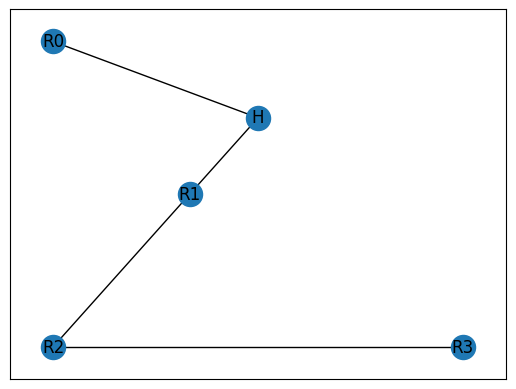

In [84]:
pos = {k : (v['pos'][1],algo.size-v['pos'][0]) for k,v in Gx.nodes(data = True)}
nx.draw_networkx(Gx, with_labels = True, pos = pos)

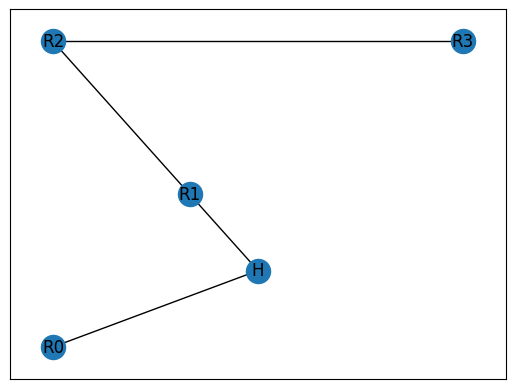

In [86]:
pos = {k : (v['pos'][1],v['pos'][0]) for k,v in Gx.nodes(data = True)}
nx.draw_networkx(Gx, with_labels = True, pos = pos)

In [22]:
G = nx.Graph(nodes)

In [26]:
G.nodes()

NodeView(('R0', 'H', 'R1', 'R2', 'R3', 'pos'))

In [ ]:
nx.from_dict_of_lists()

In [5]:
dict(np.ndenumerate(algo.T))

{(0, 0): 0.0,
 (0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (0, 4): 0.0,
 (0, 5): 0.0,
 (0, 6): 0.0,
 (0, 7): 0.0,
 (0, 8): 0.0,
 (0, 9): 0.0,
 (0, 10): 0.0,
 (0, 11): 0.0,
 (0, 12): 0.0,
 (0, 13): 0.0,
 (0, 14): 0.0,
 (0, 15): 0.0,
 (1, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 3.0,
 (1, 4): 0.0,
 (1, 5): 0.0,
 (1, 6): 0.0,
 (1, 7): 0.0,
 (1, 8): 0.0,
 (1, 9): 0.0,
 (1, 10): 0.0,
 (1, 11): 0.0,
 (1, 12): 0.0,
 (1, 13): 0.0,
 (1, 14): 0.0,
 (1, 15): 0.0,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (2, 4): 0.0,
 (2, 5): 0.0,
 (2, 6): 0.0,
 (2, 7): 0.0,
 (2, 8): 0.0,
 (2, 9): 0.0,
 (2, 10): 0.0,
 (2, 11): 0.0,
 (2, 12): 0.0,
 (2, 13): 0.0,
 (2, 14): 0.0,
 (2, 15): 0.0,
 (3, 0): 0.0,
 (3, 1): 0.0,
 (3, 2): 0.0,
 (3, 3): 0.0,
 (3, 4): 0.0,
 (3, 5): 0.0,
 (3, 6): 0.0,
 (3, 7): 0.0,
 (3, 8): 0.0,
 (3, 9): 0.0,
 (3, 10): 0.0,
 (3, 11): 0.0,
 (3, 12): 0.0,
 (3, 13): 0.0,
 (3, 14): 0.0,
 (3, 15): 0.0,
 (4, 0): 0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (4, 4): 0.0,
 (4, 5): 0

In [67]:
pos = tuple(zip(*np.where(algo.T >= 2)))
pos

# np.sort(algo.T[pos])

((1, 3), (5, 5), (9, 3), (9, 9))

In [70]:
it = list(itertools.permutations(pos, 2)) 

In [44]:
A = algo.A
T = algo.T
H1 = algo.H1

start = (3,6)

A1 = Path1(A.copy(),H1.pos)
Tpos = np.where(T == 5)
LenList = A1[Tpos]-2
idx = np.argmin(LenList)
Len = LenList[idx]
goal = tuple(zip(*Tpos))[idx]
L = Path2(A1.copy() ,H1.pos,  goal)

In [45]:
start, goal
L

((3, 6), (5, 5))

[(3, 6), (4, 5), (5, 5)]

In [41]:
L = np.array(L)+10
L = list(map(tuple, x))

[(13, 16), (14, 15), (15, 15)]